# Load embeddings of Coyne data (4 markers) and compare distance between patients (reps)

In [17]:
import os
import sys
import numpy as np
import pandas as pd
import time

os.environ['NOVA_HOME'] = '/home/projects/hornsteinlab/Collaboration/MOmaps_Sagy/NOVA_calculate_distances/NOVA/'
os.environ['NOVA_DATA_HOME'] = '/home/projects/hornsteinlab/Collaboration/NOVA/input'

sys.path.insert(1, os.getenv("NOVA_HOME"))
print(f"NOVA_HOME: {os.getenv('NOVA_HOME')}")

from src.common.utils import load_config_file
from src.embeddings.embeddings_utils import load_embeddings
from src.analysis.analyzer_distances import AnalyzerDistances
from src.figures.distances_plotting import *

# Load the autoreload extension
%load_ext autoreload
# Automatically reload modules before executing code
%autoreload 2

NOVA_HOME: /home/projects/hornsteinlab/Collaboration/MOmaps_Sagy/NOVA_calculate_distances/NOVA/
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load Embeddings

In [ ]:
output_folder_path = f"/home/projects/hornsteinlab/Collaboration/NOVA/outputs/vit_models/finetunedModel_MLPHead_acrossBatches_B56789_80pct_frozen"

config_path_data = "./manuscript/effects_config/AlyssaCoyneEffectConfig"
config_data = load_config_file(config_path_data, 'data')
config_data.OUTPUTS_FOLDER = output_folder_path


embeddings, labels, _ = load_embeddings(output_folder_path, config_data)
print(f"Loaded embeddings: {embeddings.shape}, labels: {labels.shape}")

# Calculate and save distances

In [ ]:
# Optional Flags:
# * rep_effect - Calculate distances between reps
# * multiplexed – Use this if the data is multiplexed (UMAP2).
# * detailed – Adds extra statistics to the distance summary (Increases runtime).
rep_effect = True
multiplexed = False
detailed_stats = True
metric = 'euclidean'


print(f"[Calculate distances]")
d = AnalyzerDistances(config_data, output_folder_path, rep_effect, multiplexed, detailed_stats, metric)
d.calculate(embeddings, labels)

2025-08-14 15:41:43 INFO: [Calculate distances] data_config: <class 'manuscript.effects_config.AlyssaCoyneEffectConfig'>, output_folder_path: /home/projects/hornsteinlab/Collaboration/NOVA/outputs/vit_models/finetunedModel_MLPHead_acrossBatches_B56789_80pct_frozen, rep_effect: True, multiplexed: False, detailed_stats: True, metric: euclidean
2025-08-14 15:41:43 INFO: Loaded 9118 embeddings with 84 unique labels.
2025-08-14 15:41:43 INFO: example label: Map2_sALSPositiveCytoTDP43_Untreated_batch1_rep10
2025-08-14 15:41:43 INFO: Calculating distances between reps.
2025-08-14 15:41:43 INFO: Found 16 base labels with their reps.
2025-08-14 15:41:43 INFO: Example base label: DAPI_Controls_Untreated_batch1 with reps ['DAPI_Controls_Untreated_batch1_rep1', 'DAPI_Controls_Untreated_batch1_rep2', 'DAPI_Controls_Untreated_batch1_rep3', 'DAPI_Controls_Untreated_batch1_rep4', 'DAPI_Controls_Untreated_batch1_rep5', 'DAPI_Controls_Untreated_batch1_rep6']


[Calculate distances]
[START] DAPI_Controls_Untreated_batch1_rep1 (129) vs DAPI_Controls_Untreated_batch1_rep1 (129): block_size=129
[DIST] done in 2.506s; count=8256
[FULL] done in 0.202s
[START] DAPI_Controls_Untreated_batch1_rep1 (129) vs DAPI_Controls_Untreated_batch1_rep2 (124): block_size=129
[DIST] done in 1.188s; count=15996
[FULL] done in 0.003s
[START] DAPI_Controls_Untreated_batch1_rep1 (129) vs DAPI_Controls_Untreated_batch1_rep3 (72): block_size=129
[DIST] done in 1.098s; count=9288
[FULL] done in 0.002s
[START] DAPI_Controls_Untreated_batch1_rep1 (129) vs DAPI_Controls_Untreated_batch1_rep4 (158): block_size=129
[DIST] done in 1.400s; count=20382
[FULL] done in 0.004s
[START] DAPI_Controls_Untreated_batch1_rep1 (129) vs DAPI_Controls_Untreated_batch1_rep5 (140): block_size=129
[DIST] done in 1.200s; count=18060
[FULL] done in 0.003s
[START] DAPI_Controls_Untreated_batch1_rep1 (129) vs DAPI_Controls_Untreated_batch1_rep6 (79): block_size=129
[DIST] done in 1.200s; count=10

TypeError: __get_save_path() takes 1 positional argument but 2 were given

In [14]:

d.save()

2025-08-14 16:17:05 INFO: Saving distances to /home/projects/hornsteinlab/Collaboration/NOVA/outputs/vit_models/finetunedModel_MLPHead_acrossBatches_B56789_80pct_frozen/figures/AlyssaCoyne/distances/batch1_all_reps_all_cell_lines_all_conditions_without_MERGED/distances_stats_euclidean_detailed_rep.csv
2025-08-14 16:17:05 INFO: Saved distance stats to /home/projects/hornsteinlab/Collaboration/NOVA/outputs/vit_models/finetunedModel_MLPHead_acrossBatches_B56789_80pct_frozen/figures/AlyssaCoyne/distances/batch1_all_reps_all_cell_lines_all_conditions_without_MERGED/distances_stats_euclidean_detailed_rep.csv


# Load the pre-computed distances

In [15]:
precomputed_distances_path = "/home/projects/hornsteinlab/Collaboration/NOVA/outputs/vit_models/finetunedModel_MLPHead_acrossBatches_B56789_80pct_frozen/figures/AlyssaCoyne/distances/batch1_all_reps_all_cell_lines_all_conditions_without_MERGED/distances_stats_euclidean_detailed_rep.csv"
df_stats = pd.read_csv(precomputed_distances_path)

# No condition and only 1 batch so can remove this sub-strings from labels 
df_stats['label1'] = df_stats['label1'].str.replace(r'_Untreated_batch1', '', regex=True)
df_stats['label2'] = df_stats['label2'].str.replace(r'_Untreated_batch1', '', regex=True)
df_stats['marker'] = df_stats['label1'].str.split("_").str[0]

df_stats.head(20)

,label1,label2,block_size,total_pairs,dist_time_s,stats_time_s,p5,p10,p25,p50,p75,p90,p95,lower_whisker,upper_whisker,marker
0,DAPI_Controls_rep1,DAPI_Controls_rep1,129,8256,2.506154,0.202207,0.272246,0.303806,0.363053,0.446013,0.549102,0.648850,0.724798,0.083978,0.828176,DAPI
1,DAPI_Controls_rep1,DAPI_Controls_rep2,129,15996,1.187692,0.003469,0.294815,0.330306,0.397895,0.489879,0.601074,0.729806,0.827491,0.093126,0.905843,DAPI
2,DAPI_Controls_rep1,DAPI_Controls_rep3,129,9288,1.097548,0.001962,0.319295,0.353749,0.425017,0.530635,0.658885,0.793393,0.883093,0.074214,1.009687,DAPI
3,DAPI_Controls_rep1,DAPI_Controls_rep4,129,20382,1.399826,0.003856,0.327445,0.365092,0.436974,0.530958,0.633818,0.740628,0.821183,0.141706,0.929086,DAPI
4,DAPI_Controls_rep1,DAPI_Controls_rep5,129,18060,1.199806,0.003436,0.297073,0.327863,0.390972,0.476872,0.582920,0.692796,0.766832,0.103051,0.870841,DAPI
5,DAPI_Controls_rep1,DAPI_Controls_rep6,129,10191,1.200124,0.003317,0.347709,0.391843,0.482990,0.620088,0.803785,0.955155,1.014899,0.001796,1.284979,DAPI
6,DAPI_Controls_rep2,DAPI_Controls_rep2,124,7626,1.600280,0.001940,0.283385,0.320832,0.394985,0.495261,0.626192,0.784829,0.884583,0.048176,0.973001,DAPI
7,DAPI_Controls_rep2,DAPI_Controls_rep3,124,8928,1.199687,0.001834,0.312546,0.349173,0.428721,0.544109,0.689904,0.840433,0.914604,0.036946,1.081679,DAPI
8,DAPI_Controls_rep2,DAPI_Controls_rep4,124,19592,1.297861,0.003870,0.356506,0.399354,0.479112,0.583887,0.693799,0.794086,0.861917,0.157083,1.015828,DAPI
9,DAPI_Controls_rep2,DAPI_Controls_rep5,124,17360,1.101175,0.003290,0.293920,0.330186,0.398527,0.493011,0.616485,0.763990,0.861815,0.071589,0.943422,DAPI


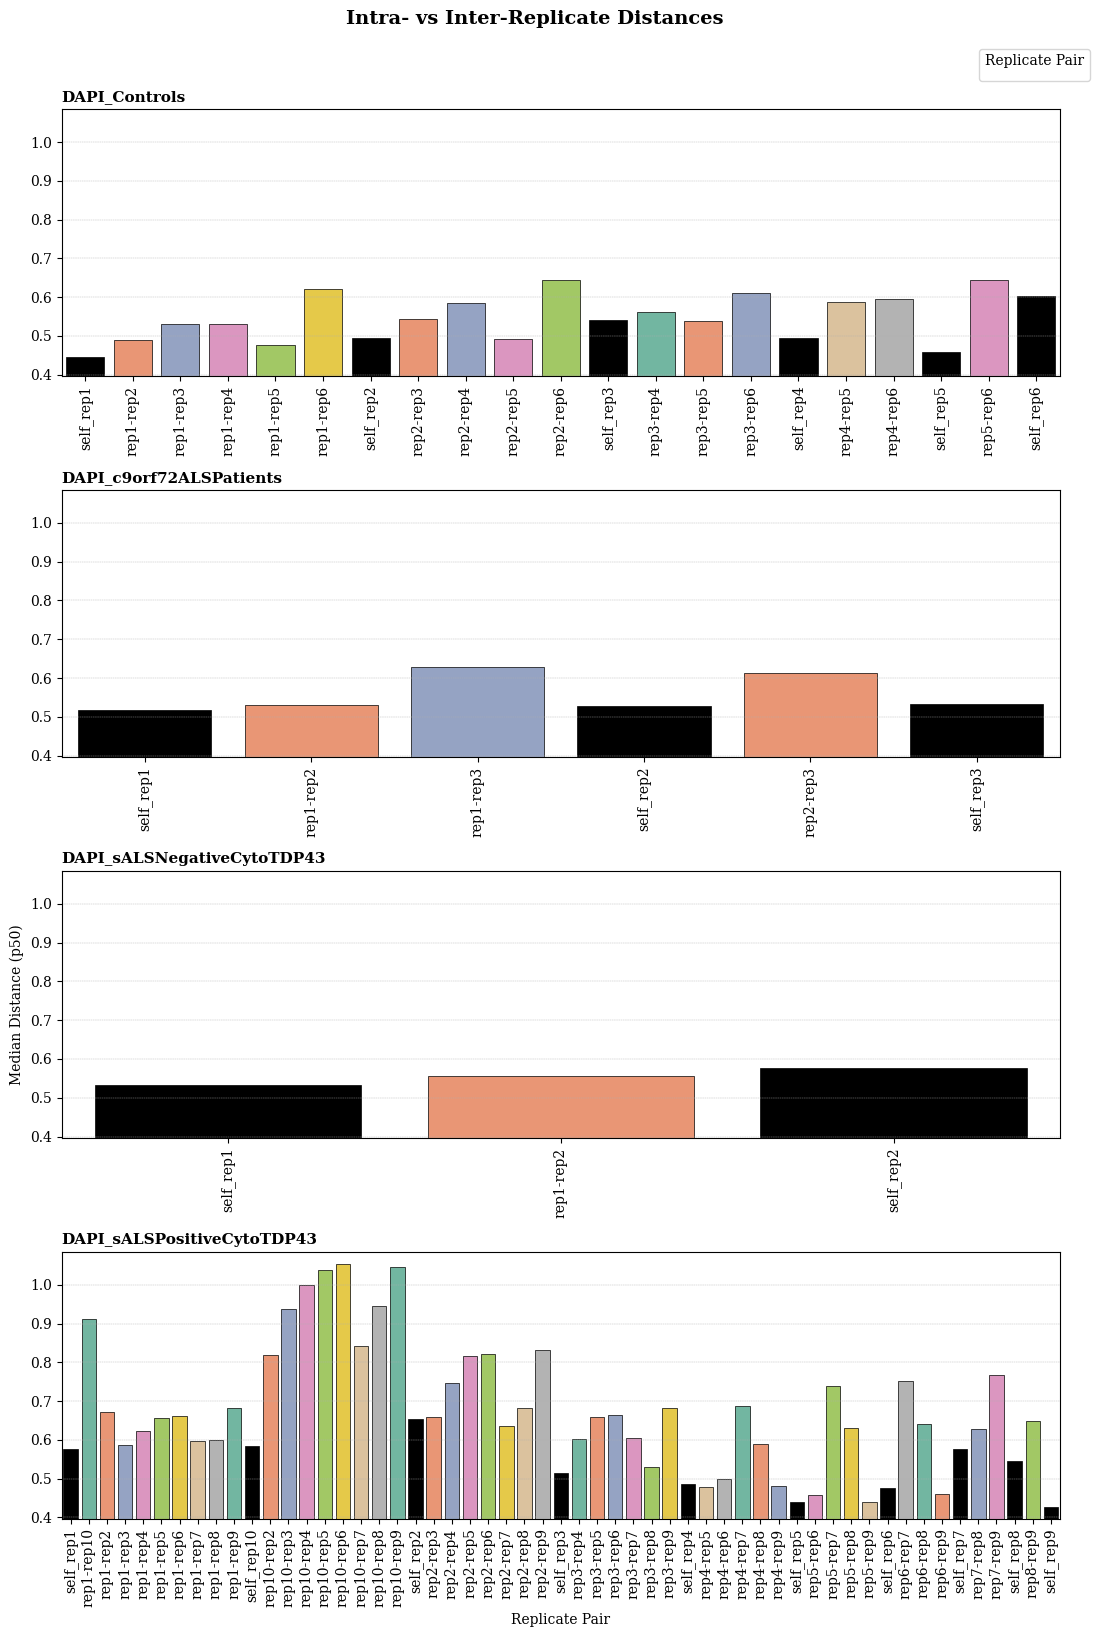

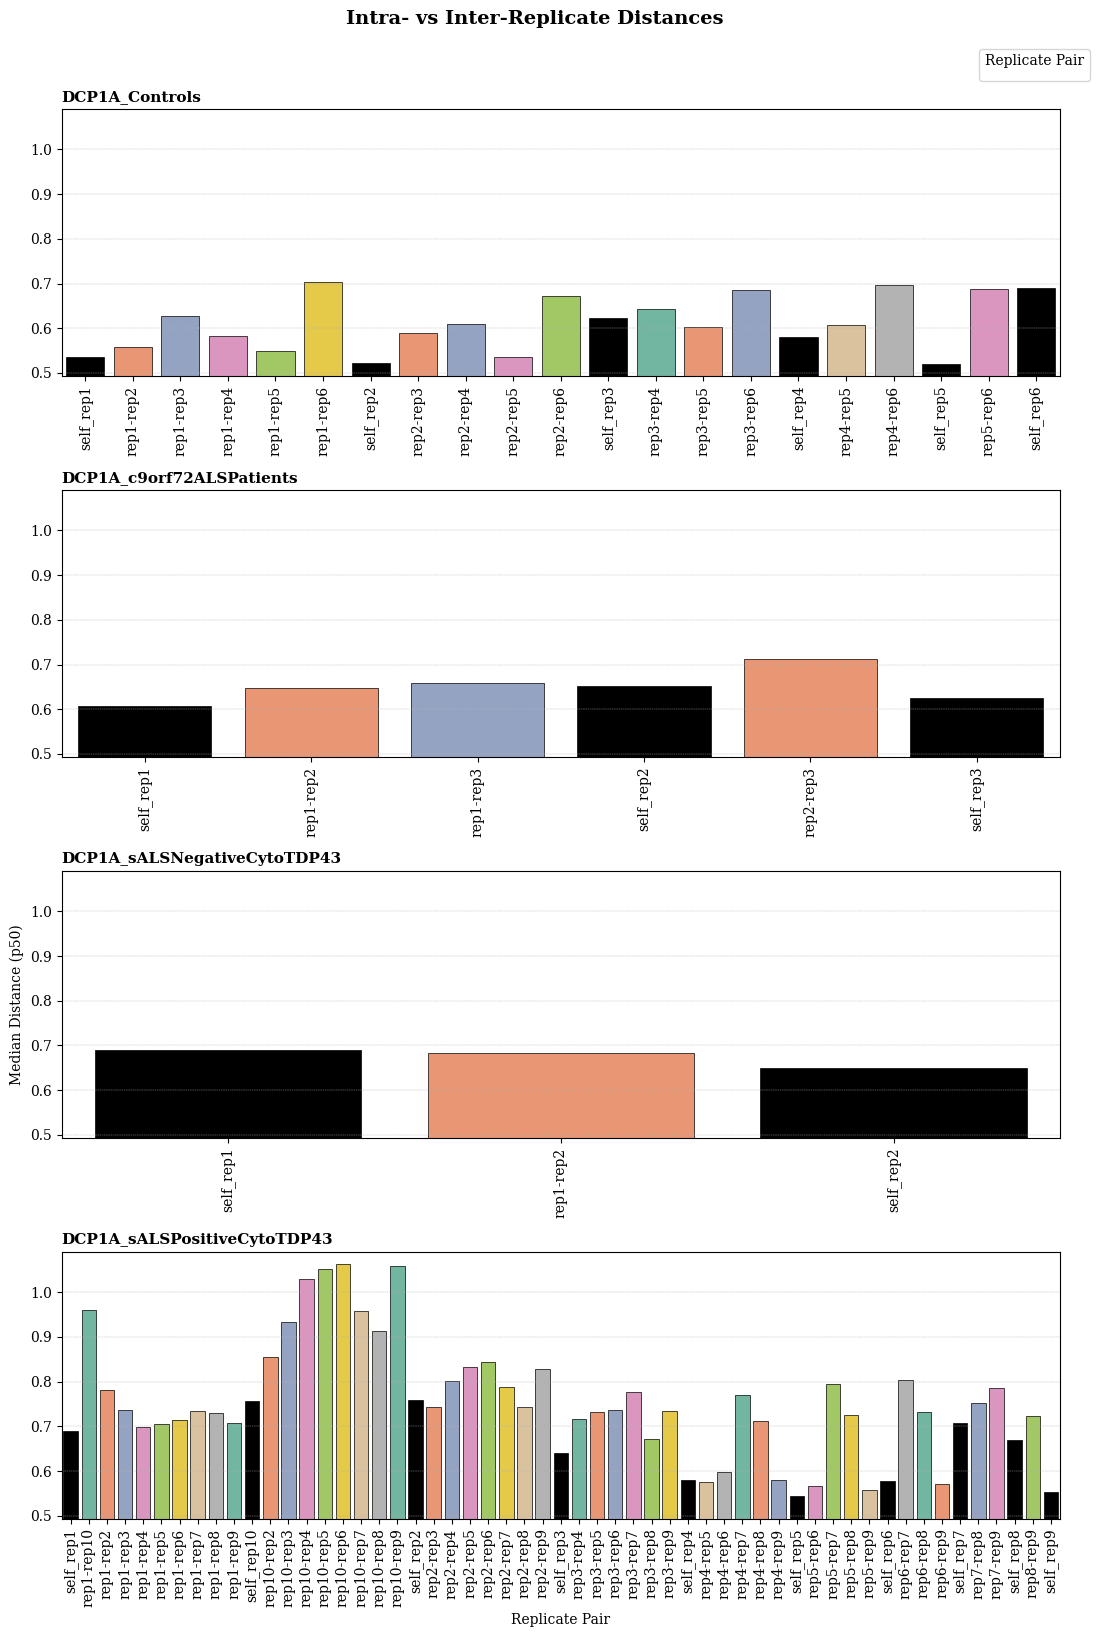

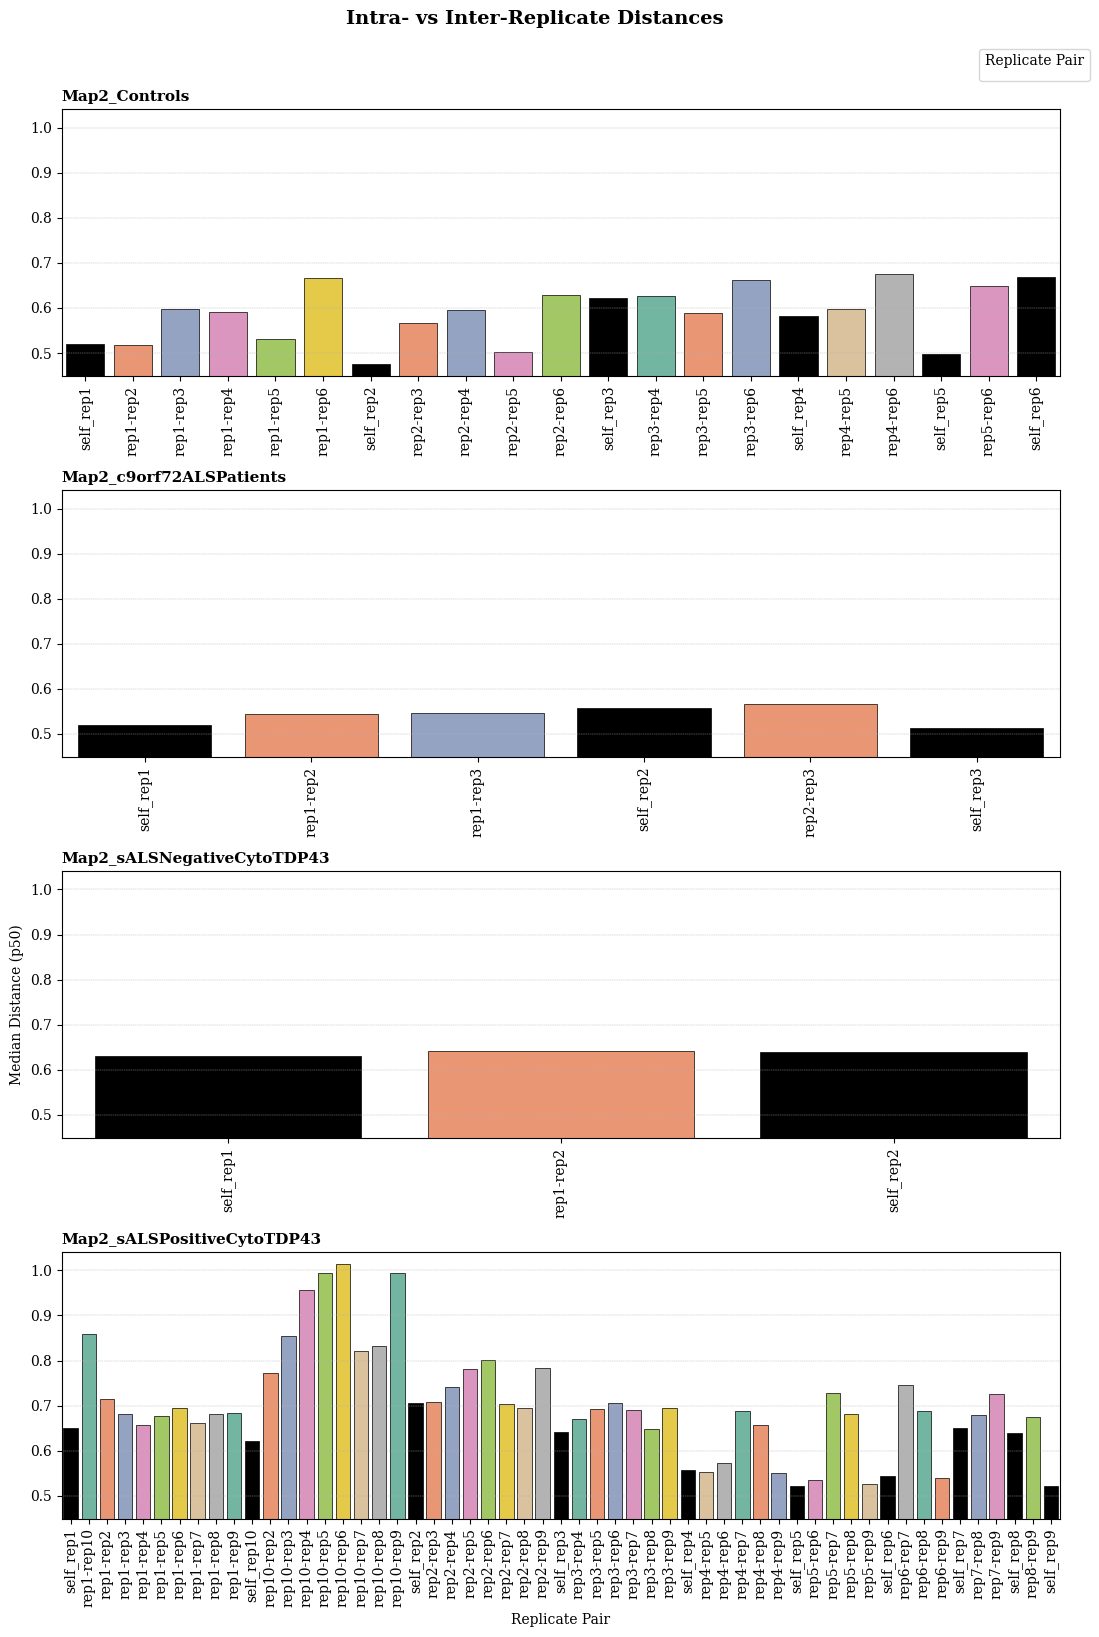

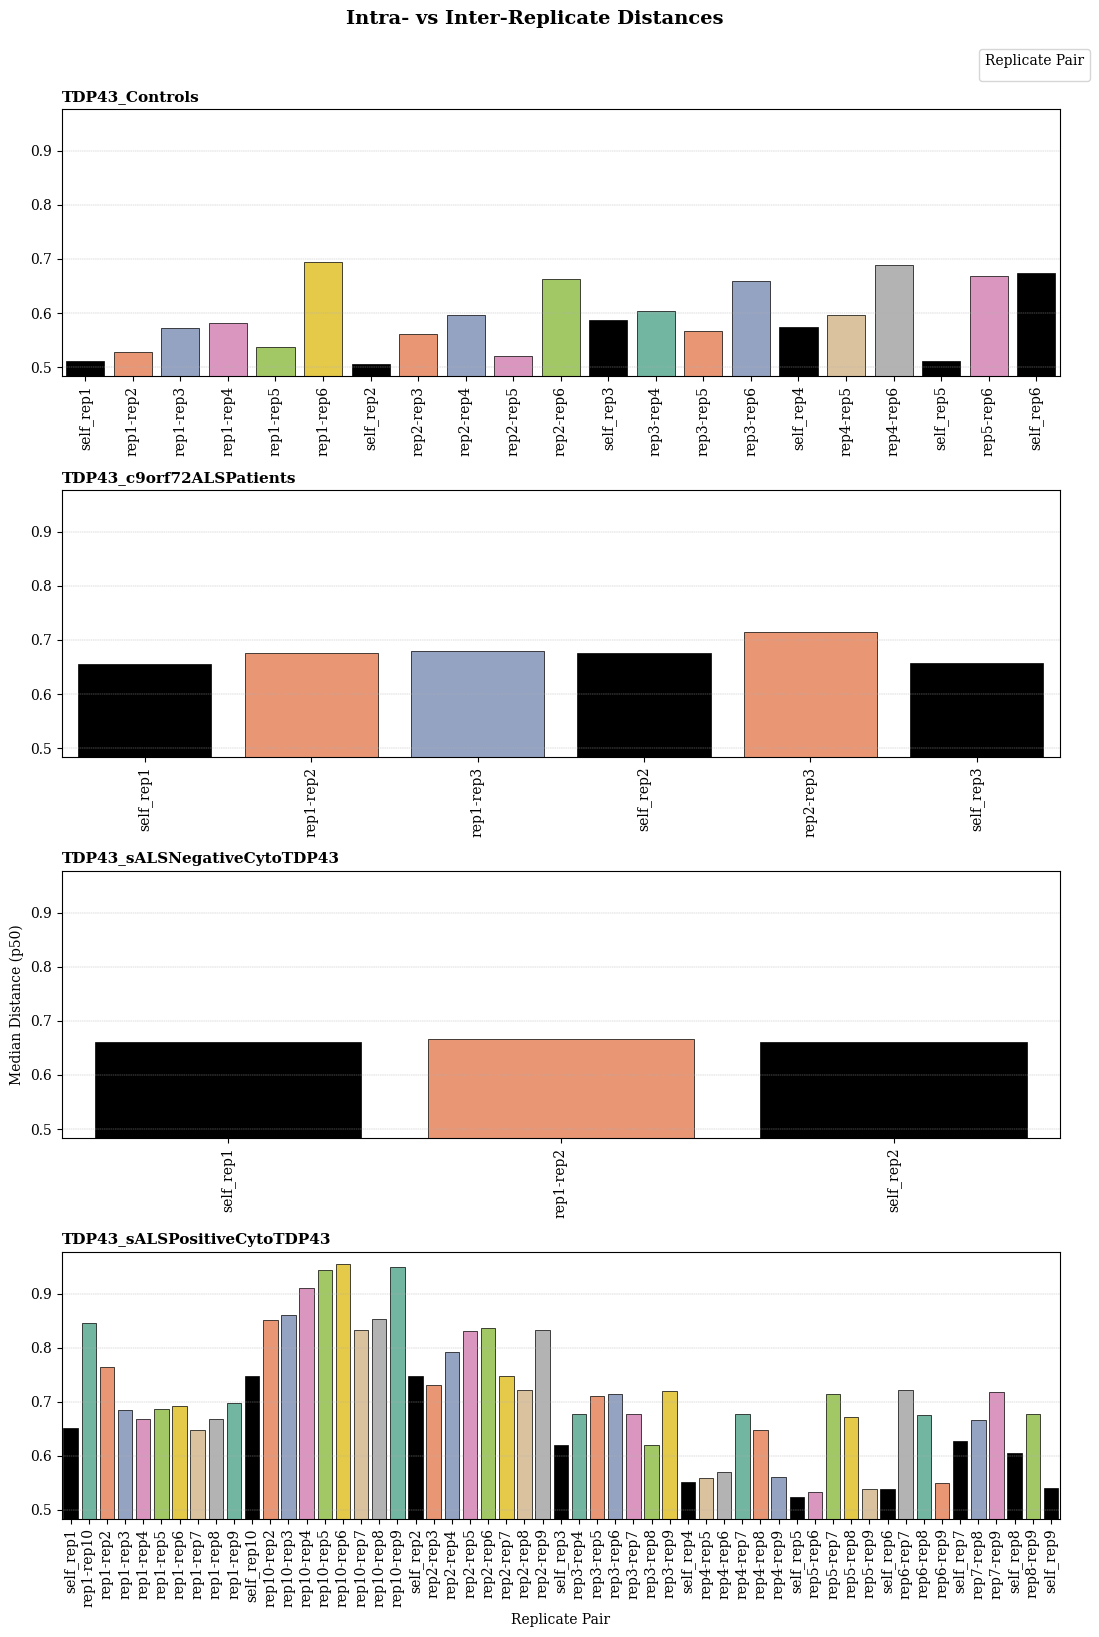

In [18]:
markers = df_stats['marker'].unique()
for marker in markers:
    df_tmp = df_stats[df_stats['marker']==marker]
    
    plot_replicate_bars_extended(df_tmp, figsize=(6,4), pad_frac=0.05)


# Distances between cell lines (gene groups)

In [24]:
# Optional Flags:
# * rep_effect - Calculate distances between reps
# * multiplexed – Use this if the data is multiplexed (UMAP2).
# * detailed – Adds extra statistics to the distance summary (Increases runtime).
rep_effect = False
multiplexed = True
detailed_stats = True

print(f"[Calculate distances]")
d = AnalyzerDistances(config_data, output_folder_path, rep_effect, multiplexed, detailed_stats, metric)
d.calculate(embeddings, labels)
d.save()

2025-08-14 16:43:51 INFO: [Calculate distances] data_config: <class 'manuscript.effects_config.AlyssaCoyneEffectConfig'>, output_folder_path: /home/projects/hornsteinlab/Collaboration/NOVA/outputs/vit_models/finetunedModel_MLPHead_acrossBatches_B56789_80pct_frozen, rep_effect: False, multiplexed: True, detailed_stats: True, metric: euclidean
2025-08-14 16:43:51 INFO: Multiplexed embeddings detected, transforming embeddings and labels using AnalyzerMultiplexMarkers.
2025-08-14 16:43:51 INFO: [AnalyzerMultiplexMarkers.calculate] Embeddings shape: (9118, 192), Labels shape: (9118,)


[Calculate distances]


2025-08-14 16:43:52 INFO: [AnalyzerMultiplexMarkers.calculate] Common markers: ['Map2' 'DCP1A' 'TDP43' 'DAPI']
2025-08-14 16:43:52 INFO: [AnalyzerMultiplexMarkers.calculate] Phenotype: Controls_Untreated_batch1_rep1
2025-08-14 16:43:52 INFO: [AnalyzerMultiplexMarkers.calculate] Detected 129 subgroups
100%|██████████| 129/129 [00:00<00:00, 693.55it/s]
2025-08-14 16:43:52 INFO: [AnalyzerMultiplexMarkers.calculate] [Controls_Untreated_batch1_rep1] multiplexed embeddings shape: (129, 768) phenotype_repeated shape: (129,)
2025-08-14 16:43:52 INFO: [AnalyzerMultiplexMarkers.calculate] Phenotype: Controls_Untreated_batch1_rep2
2025-08-14 16:43:52 INFO: [AnalyzerMultiplexMarkers.calculate] Detected 124 subgroups
100%|██████████| 124/124 [00:00<00:00, 707.50it/s]
2025-08-14 16:43:52 INFO: [AnalyzerMultiplexMarkers.calculate] [Controls_Untreated_batch1_rep2] multiplexed embeddings shape: (124, 768) phenotype_repeated shape: (124,)
2025-08-14 16:43:52 INFO: [AnalyzerMultiplexMarkers.calculate] Ph

[START] Controls_Untreated_batch1_rep1 (129) vs Controls_Untreated_batch1_rep1 (129): block_size=129
[DIST] done in 2.702s; count=8256
[FULL] done in 0.002s
[START] Controls_Untreated_batch1_rep1 (129) vs Controls_Untreated_batch1_rep2 (124): block_size=129
[DIST] done in 2.201s; count=15996
[FULL] done in 0.003s
[START] Controls_Untreated_batch1_rep1 (129) vs Controls_Untreated_batch1_rep3 (72): block_size=129
[DIST] done in 2.995s; count=9288
[FULL] done in 0.002s
[START] Controls_Untreated_batch1_rep1 (129) vs Controls_Untreated_batch1_rep4 (158): block_size=129
[DIST] done in 3.101s; count=20382
[FULL] done in 0.103s
[START] Controls_Untreated_batch1_rep1 (129) vs Controls_Untreated_batch1_rep5 (140): block_size=129
[DIST] done in 4.395s; count=18060
[FULL] done in 0.004s
[START] Controls_Untreated_batch1_rep1 (129) vs Controls_Untreated_batch1_rep6 (79): block_size=129
[DIST] done in 3.200s; count=10191
[FULL] done in 0.002s
[START] Controls_Untreated_batch1_rep1 (129) vs c9orf72A

2025-08-14 16:56:12 INFO: Saving distances to /home/projects/hornsteinlab/Collaboration/NOVA/outputs/vit_models/finetunedModel_MLPHead_acrossBatches_B56789_80pct_frozen/figures/AlyssaCoyne/distances/batch1_all_reps_all_cell_lines_all_conditions_without_MERGED/distances_stats_euclidean_detailed_multiplexed.csv
2025-08-14 16:56:12 INFO: Saved distance stats to /home/projects/hornsteinlab/Collaboration/NOVA/outputs/vit_models/finetunedModel_MLPHead_acrossBatches_B56789_80pct_frozen/figures/AlyssaCoyne/distances/batch1_all_reps_all_cell_lines_all_conditions_without_MERGED/distances_stats_euclidean_detailed_multiplexed.csv


[DIST] done in 2.700s; count=4371
[FULL] done in 0.002s


# Load the pre-computed distances between SM vectros (UMAP2)

In [25]:
# Load distances 
precomputed_distances_path = "/home/projects/hornsteinlab/Collaboration/NOVA/outputs/vit_models/finetunedModel_MLPHead_acrossBatches_B56789_80pct_frozen/figures/AlyssaCoyne/distances/batch1_all_reps_all_cell_lines_all_conditions_without_MERGED/distances_stats_euclidean_detailed_multiplexed.csv"
cell_lines_stats = pd.read_csv(precomputed_distances_path)

# Change labels to be cell lines (gene groups!)
for col in ['label1','label2']:
    # No condition and only 1 batch so can remove this sub-strings from labels 
    cell_lines_stats[col] = cell_lines_stats[col].str.replace(r'_Untreated_batch1', '', regex=True)
    
    # Save cell line only
    #cell_lines_stats[col] = cell_lines_stats[col].str.split(pat='_', n=1).str[0]
    
    # Save original 
    cell_lines_stats[f'orig_{col}'] = cell_lines_stats[col]
    

    

cell_lines_stats.sample(5)

,label1,label2,block_size,total_pairs,dist_time_s,stats_time_s,p5,p10,p25,p50,p75,p90,p95,lower_whisker,upper_whisker,orig_label1,orig_label2
20,Controls_rep1,sALSPositiveCytoTDP43_rep9,129,12126,3.399806,0.101794,0.535262,0.556013,0.591018,0.632552,0.676953,0.717878,0.742202,0.462116,0.805855,Controls_rep1,sALSPositiveCytoTDP43_rep9
18,Controls_rep1,sALSPositiveCytoTDP43_rep7,129,16383,2.597428,0.102029,0.670952,0.695510,0.737619,0.782764,0.829566,0.870785,0.894678,0.599698,0.967486,Controls_rep1,sALSPositiveCytoTDP43_rep7
205,sALSPositiveCytoTDP43_rep3,sALSPositiveCytoTDP43_rep5,62,6262,1.601143,0.001672,0.592874,0.616588,0.660874,0.705807,0.748312,0.787074,0.811493,0.529718,0.879468,sALSPositiveCytoTDP43_rep3,sALSPositiveCytoTDP43_rep5
166,sALSNegativeCytoTDP43_rep2,sALSPositiveCytoTDP43_rep1,89,11837,3.598457,0.003436,0.622977,0.647906,0.691443,0.740325,0.788829,0.834552,0.861926,0.545363,0.934909,sALSNegativeCytoTDP43_rep2,sALSPositiveCytoTDP43_rep1
204,sALSPositiveCytoTDP43_rep3,sALSPositiveCytoTDP43_rep4,62,7874,2.507450,0.001652,0.565503,0.591628,0.633828,0.679088,0.723438,0.762514,0.785548,0.499414,0.857852,sALSPositiveCytoTDP43_rep3,sALSPositiveCytoTDP43_rep4


In [27]:
cell_lines_stats[cell_lines_stats['label1'] == 'Controls_rep1']

,label1,label2,block_size,total_pairs,dist_time_s,stats_time_s,p5,p10,p25,p50,p75,p90,p95,lower_whisker,upper_whisker,orig_label1,orig_label2
0,Controls_rep1,Controls_rep1,129,8256,2.701952,0.001689,0.429234,0.448241,0.485859,0.533345,0.586872,0.646789,0.679897,0.334341,0.738390,Controls_rep1,Controls_rep1
1,Controls_rep1,Controls_rep2,129,15996,2.200967,0.003081,0.442218,0.465512,0.508212,0.561499,0.621011,0.676314,0.708968,0.339013,0.790209,Controls_rep1,Controls_rep2
2,Controls_rep1,Controls_rep3,129,9288,2.995239,0.002411,0.486758,0.512115,0.558513,0.615220,0.681247,0.747007,0.788203,0.374411,0.865349,Controls_rep1,Controls_rep3
3,Controls_rep1,Controls_rep4,129,20382,3.100678,0.102991,0.489501,0.511124,0.549412,0.596442,0.648816,0.698344,0.726855,0.400306,0.797922,Controls_rep1,Controls_rep4
4,Controls_rep1,Controls_rep5,129,18060,4.395415,0.003563,0.443409,0.465954,0.505666,0.553365,0.607189,0.662562,0.698276,0.353381,0.759474,Controls_rep1,Controls_rep5
5,Controls_rep1,Controls_rep6,129,10191,3.200488,0.002316,0.551274,0.588201,0.648899,0.724063,0.785646,0.834137,0.865836,0.443778,0.990767,Controls_rep1,Controls_rep6
6,Controls_rep1,c9orf72ALSPatients_rep1,129,17028,2.800500,0.003214,0.966242,0.986543,1.018279,1.050335,1.079493,1.104519,1.118988,0.926458,1.171313,Controls_rep1,c9orf72ALSPatients_rep1
7,Controls_rep1,c9orf72ALSPatients_rep2,129,18705,3.599751,0.003733,0.951724,0.972024,1.001635,1.032003,1.059427,1.082949,1.097043,0.914946,1.146116,Controls_rep1,c9orf72ALSPatients_rep2
8,Controls_rep1,c9orf72ALSPatients_rep3,129,9933,2.098016,0.002025,0.997014,1.016119,1.045140,1.075476,1.103541,1.128475,1.143891,0.957538,1.191142,Controls_rep1,c9orf72ALSPatients_rep3
9,Controls_rep1,sALSNegativeCytoTDP43_rep1,129,11094,3.199857,0.002405,0.697734,0.724596,0.766776,0.818347,0.871758,0.918755,0.945189,0.609302,1.029232,Controls_rep1,sALSNegativeCytoTDP43_rep1


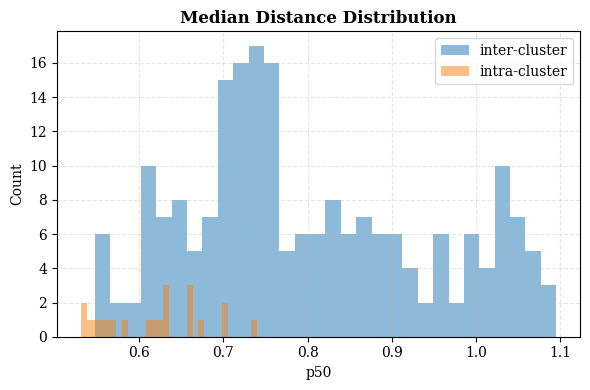

,label1,label2,block_size,total_pairs,dist_time_s,stats_time_s,p5,p10,p25,p50,p75,p90,p95,lower_whisker,upper_whisker,orig_label1,orig_label2
78,Controls_rep5,Controls_rep5,140,9730,3.500593,0.001975,0.420410,0.440724,0.480260,0.530445,0.590132,0.645594,0.683235,0.315452,0.754941,Controls_rep5,Controls_rep5
0,Controls_rep1,Controls_rep1,129,8256,2.701952,0.001689,0.429234,0.448241,0.485859,0.533345,0.586872,0.646789,0.679897,0.334341,0.738390,Controls_rep1,Controls_rep1
216,sALSPositiveCytoTDP43_rep5,sALSPositiveCytoTDP43_rep5,101,5050,2.001766,0.001654,0.434096,0.455487,0.491265,0.538188,0.593545,0.654150,0.686710,0.337845,0.746966,sALSPositiveCytoTDP43_rep5,sALSPositiveCytoTDP43_rep5
230,sALSPositiveCytoTDP43_rep9,sALSPositiveCytoTDP43_rep9,94,4371,2.700098,0.002369,0.432246,0.453758,0.493041,0.544826,0.600654,0.645822,0.671063,0.331622,0.762073,sALSPositiveCytoTDP43_rep9,sALSPositiveCytoTDP43_rep9
21,Controls_rep2,Controls_rep2,124,7626,1.699465,0.002477,0.419640,0.445261,0.490549,0.552087,0.616789,0.671076,0.706466,0.301189,0.806149,Controls_rep2,Controls_rep2
221,sALSPositiveCytoTDP43_rep6,sALSPositiveCytoTDP43_rep6,111,6105,2.798743,0.002042,0.459454,0.479349,0.518706,0.563052,0.610821,0.653711,0.680456,0.380534,0.748993,sALSPositiveCytoTDP43_rep6,sALSPositiveCytoTDP43_rep6
210,sALSPositiveCytoTDP43_rep4,sALSPositiveCytoTDP43_rep4,127,8001,2.700748,0.001669,0.466748,0.487151,0.523419,0.565960,0.613782,0.655766,0.680483,0.387875,0.749325,sALSPositiveCytoTDP43_rep4,sALSPositiveCytoTDP43_rep4
60,Controls_rep4,Controls_rep4,158,12403,3.001272,0.002458,0.477540,0.499125,0.536915,0.584845,0.636795,0.686224,0.717499,0.387096,0.786614,Controls_rep4,Controls_rep4
111,c9orf72ALSPatients_rep1,c9orf72ALSPatients_rep1,132,8646,2.798014,0.098695,0.487877,0.512566,0.555524,0.608509,0.664060,0.710726,0.738361,0.392720,0.826865,c9orf72ALSPatients_rep1,c9orf72ALSPatients_rep1
140,c9orf72ALSPatients_rep3,c9orf72ALSPatients_rep3,77,2926,1.200889,0.001282,0.492073,0.517107,0.561357,0.618907,0.681334,0.736761,0.772899,0.381392,0.861300,c9orf72ALSPatients_rep3,c9orf72ALSPatients_rep3


In [28]:
plot_dist_histogram(cell_lines_stats)
# some lines have big distance, investigate them - it's mostly rep10 and rep2 in sALS positive. 
intra = cell_lines_stats[cell_lines_stats.label1 == cell_lines_stats.label2]
intra.sort_values(by='p50').tail(30)

Controls_rep1
(21, 17)


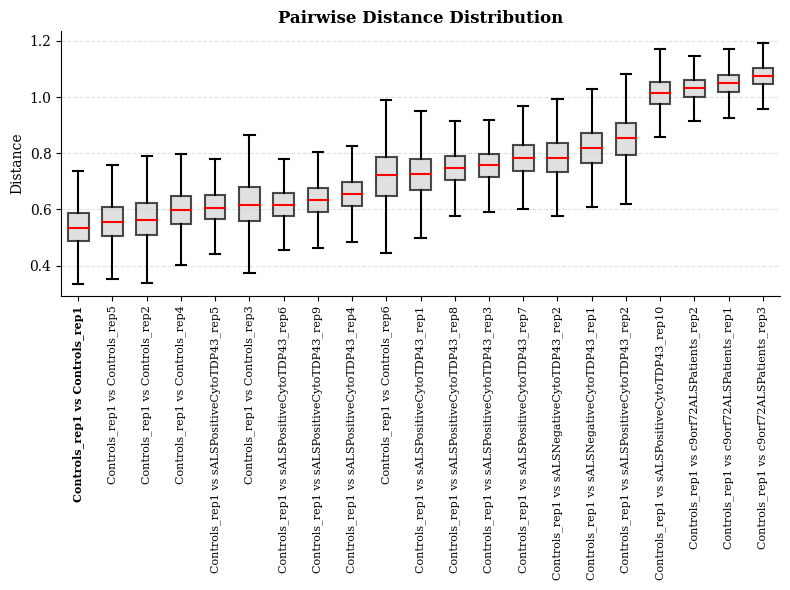

Controls_rep2
(20, 17)


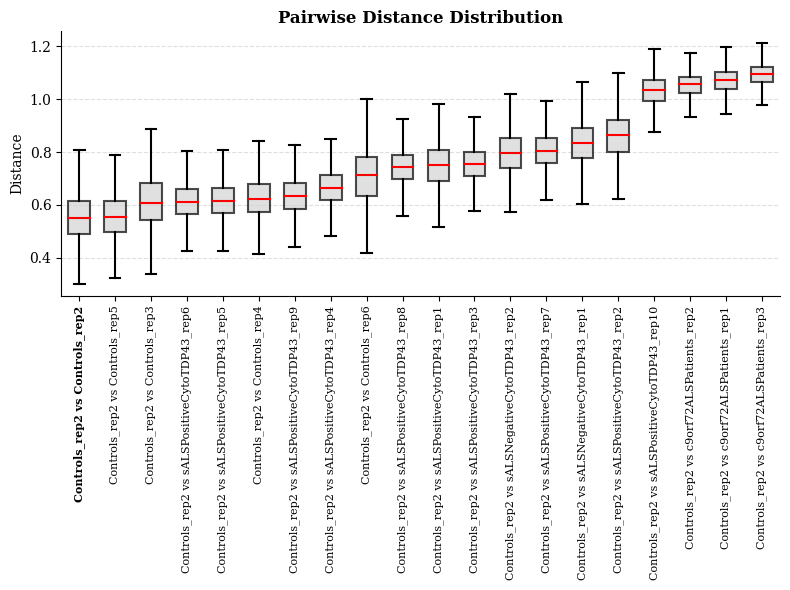

Controls_rep3
(19, 17)


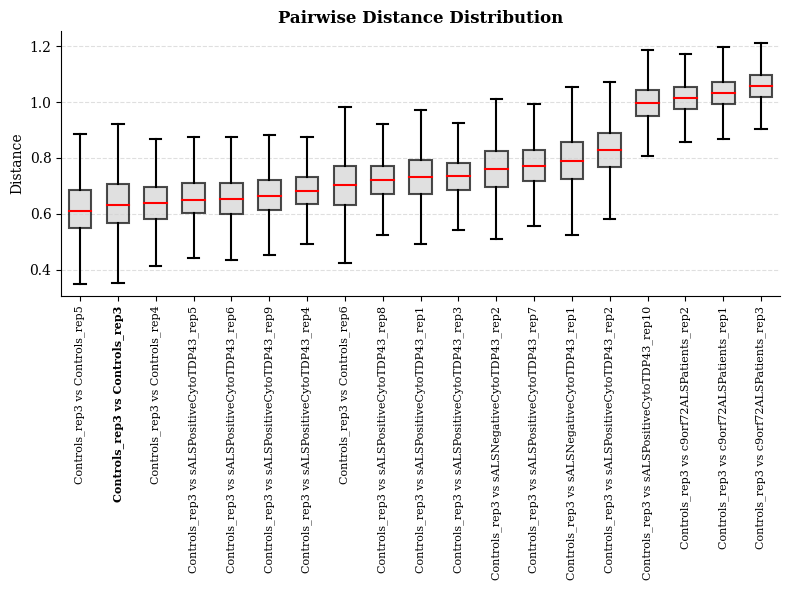

Controls_rep4
(18, 17)


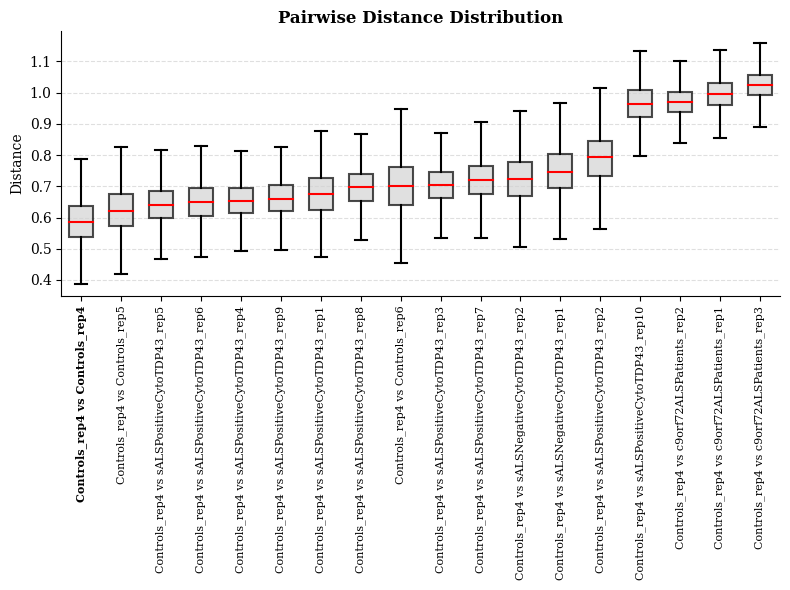

Controls_rep5
(17, 17)


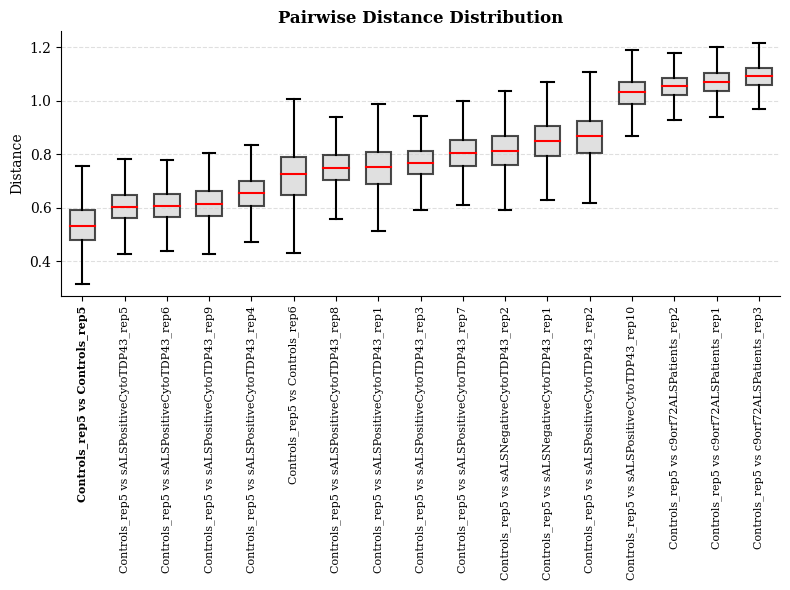

Controls_rep6
(16, 17)


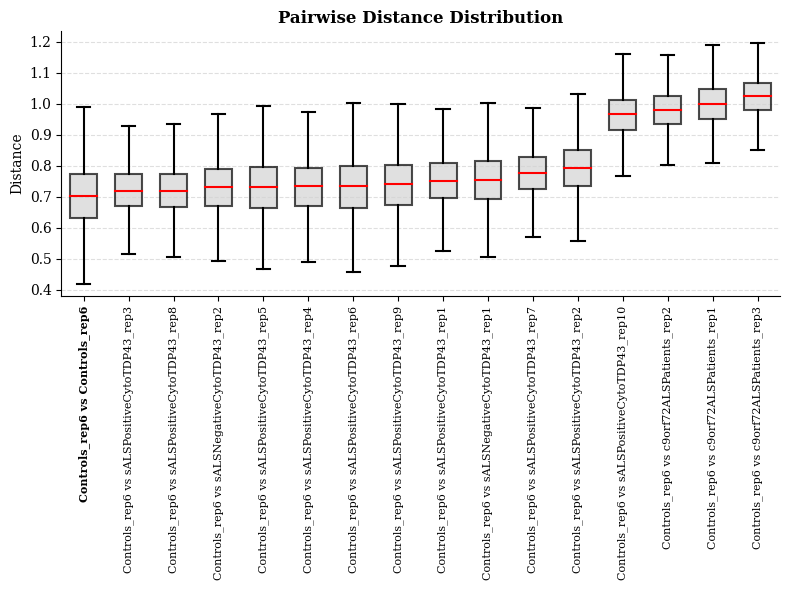

c9orf72ALSPatients_rep1
(15, 17)


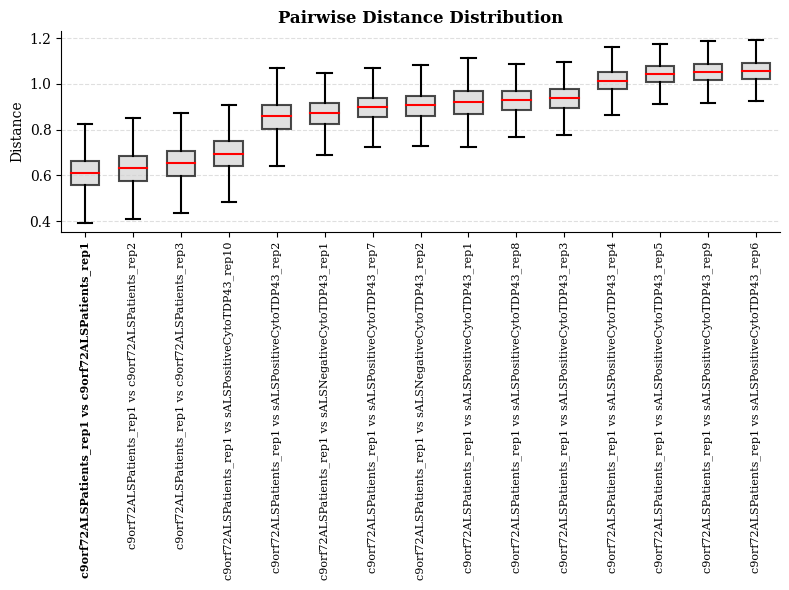

c9orf72ALSPatients_rep2
(14, 17)


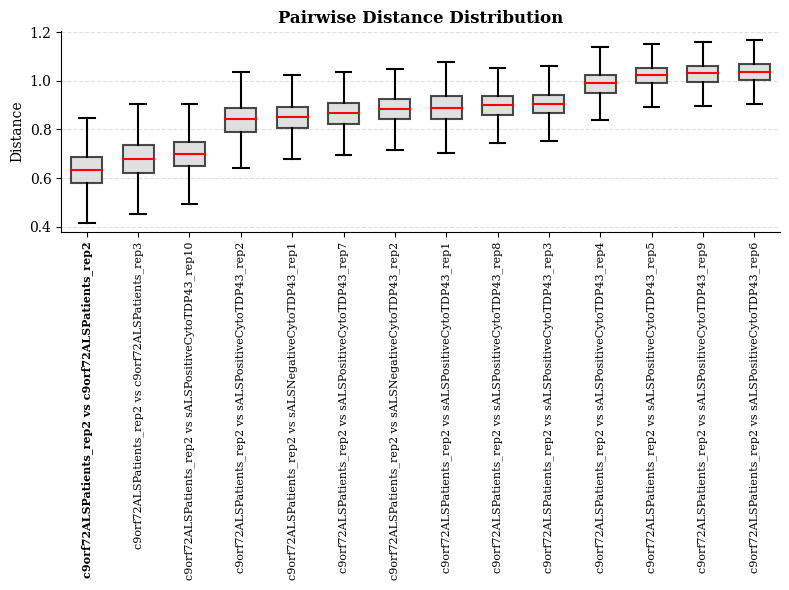

c9orf72ALSPatients_rep3
(13, 17)


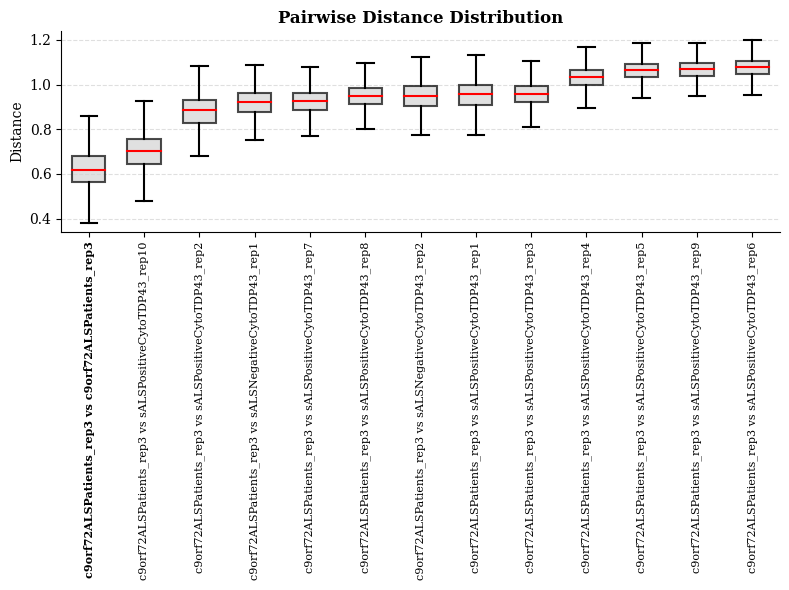

sALSNegativeCytoTDP43_rep1
(12, 17)


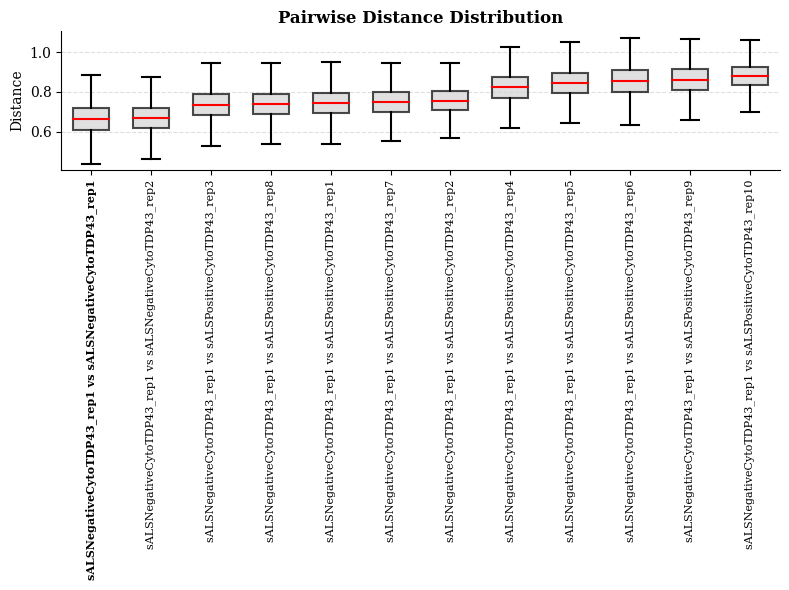

sALSNegativeCytoTDP43_rep2
(11, 17)


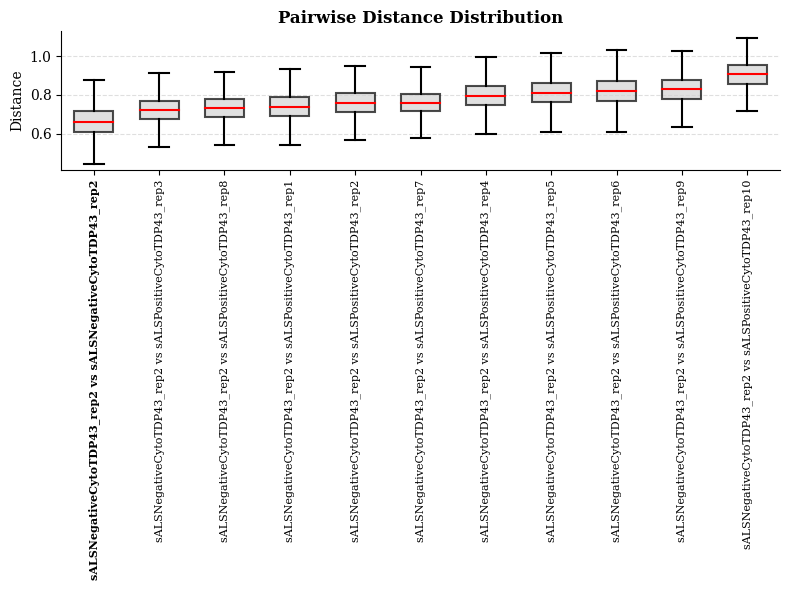

sALSPositiveCytoTDP43_rep1
(10, 17)


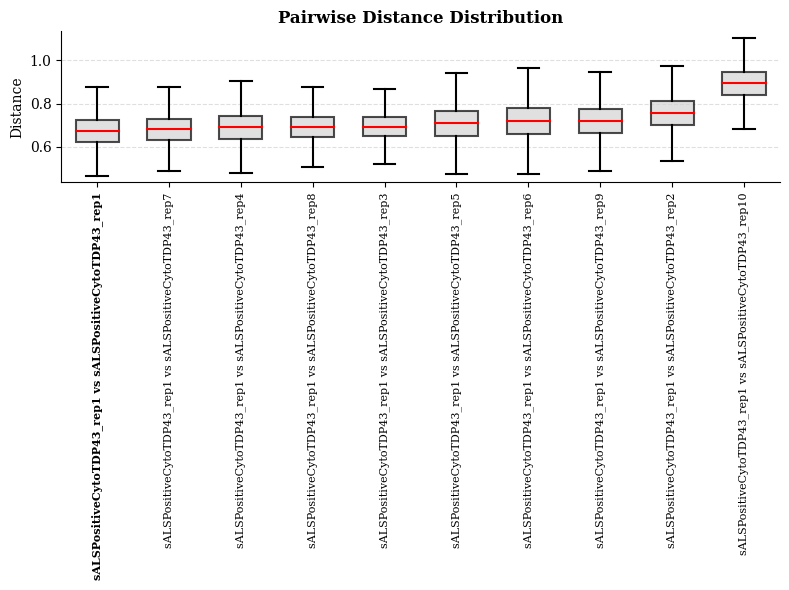

sALSPositiveCytoTDP43_rep10
(9, 17)


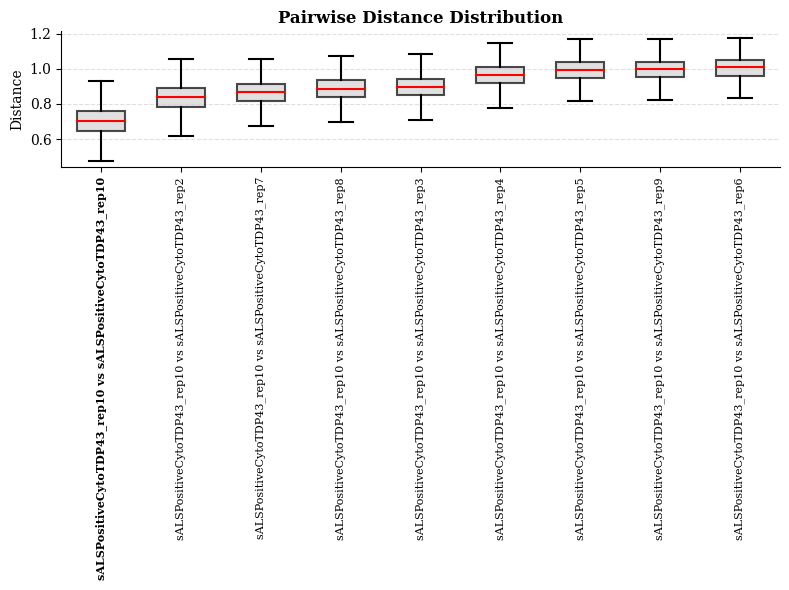

sALSPositiveCytoTDP43_rep2
(8, 17)


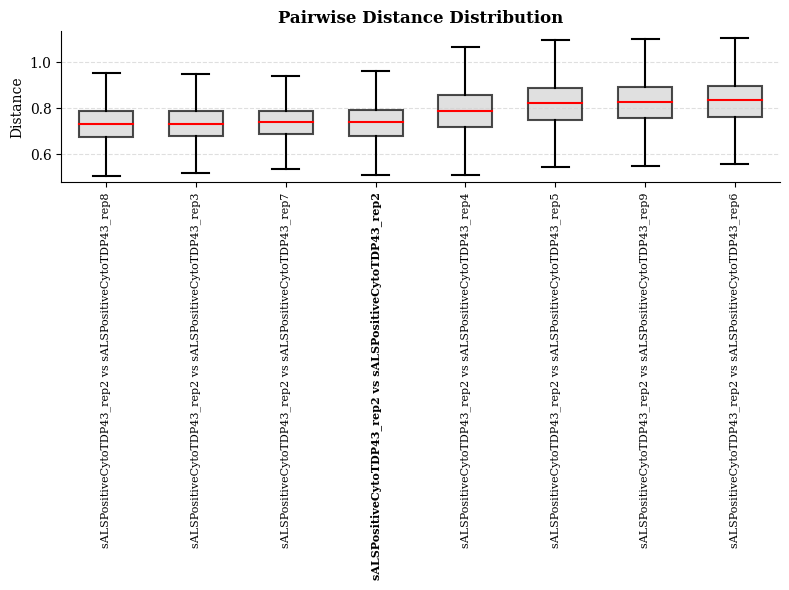

sALSPositiveCytoTDP43_rep3
(7, 17)


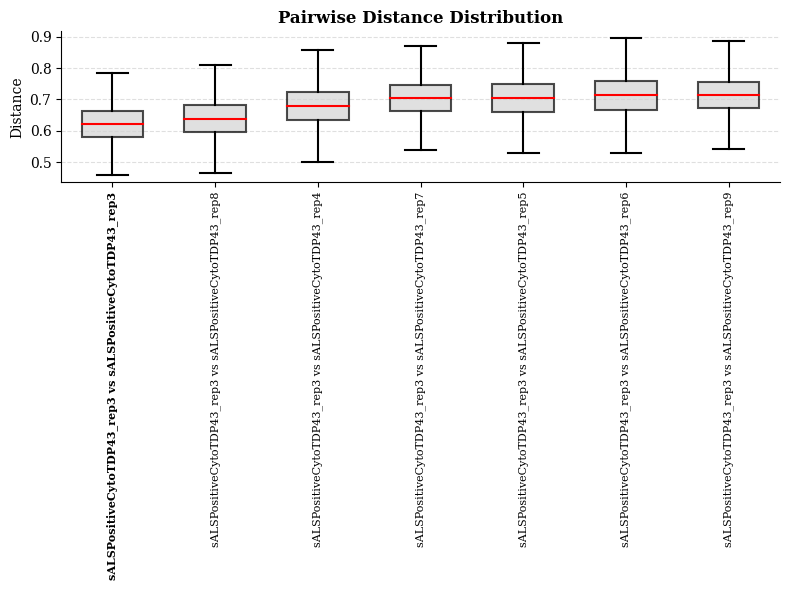

sALSPositiveCytoTDP43_rep4
(6, 17)


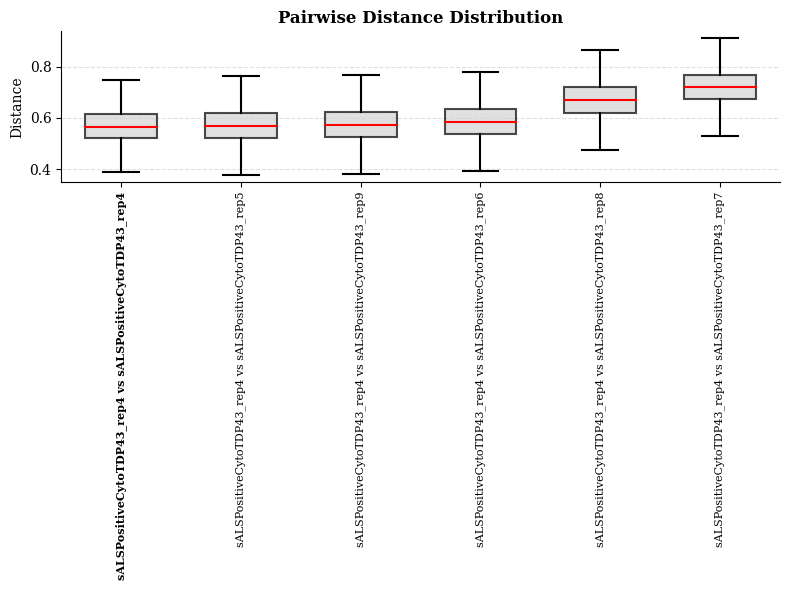

sALSPositiveCytoTDP43_rep5
(5, 17)


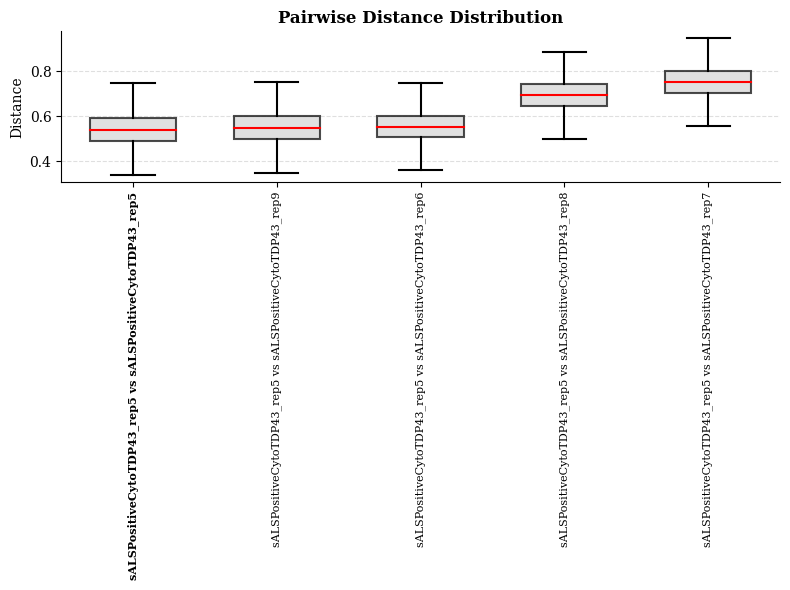

sALSPositiveCytoTDP43_rep6
(4, 17)


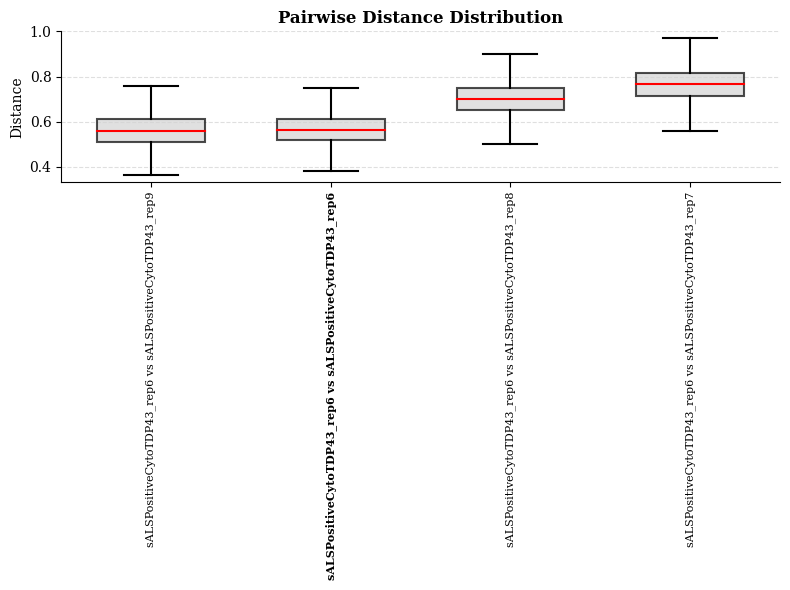

sALSPositiveCytoTDP43_rep7
(3, 17)


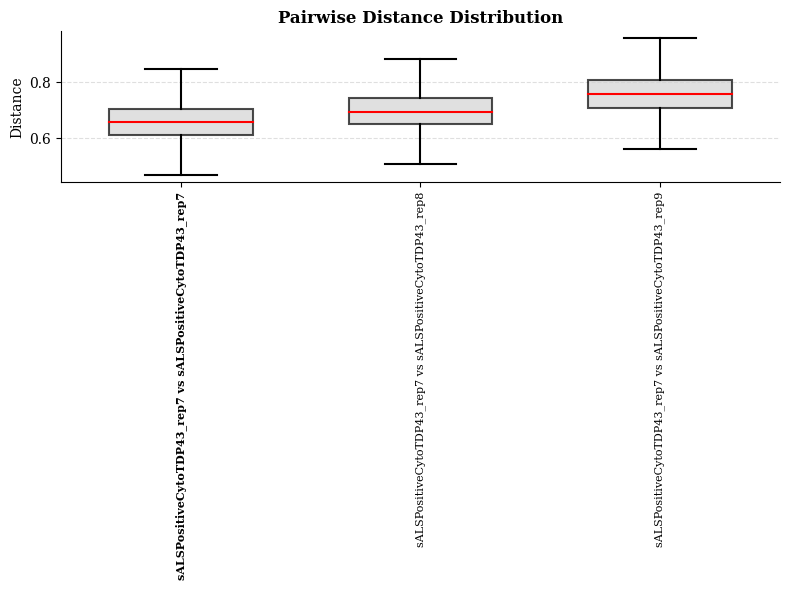

sALSPositiveCytoTDP43_rep8
(2, 17)


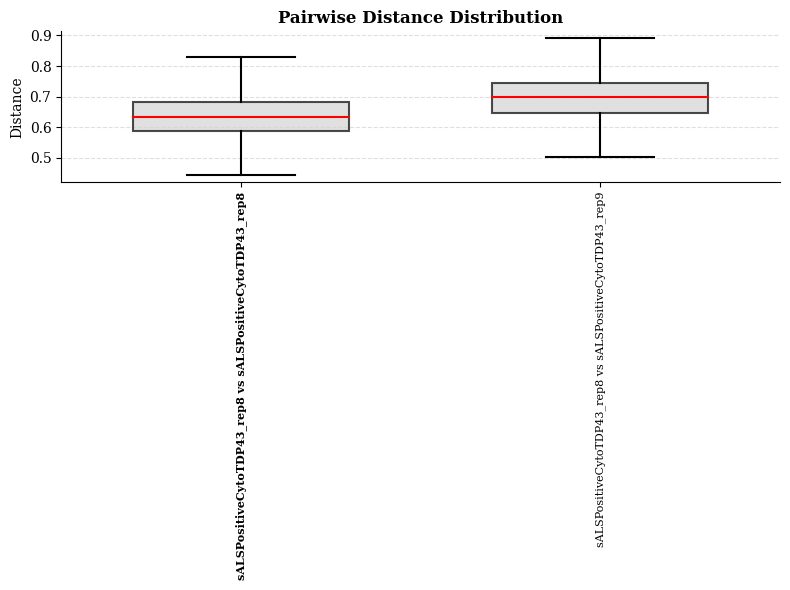

sALSPositiveCytoTDP43_rep9
(1, 17)


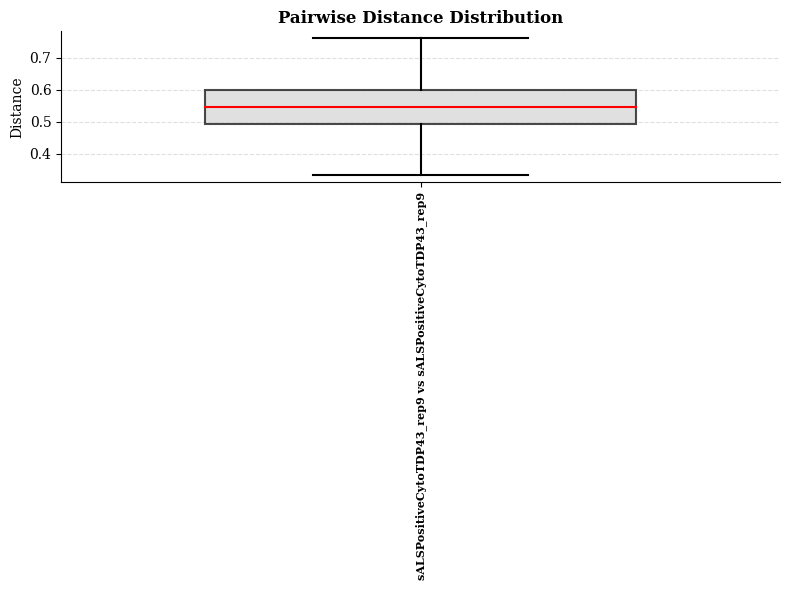

In [29]:
gene_groups = cell_lines_stats.label1.unique()
for gene_group in gene_groups:
    print(gene_group)
    tmp_df = cell_lines_stats[cell_lines_stats['label1']==gene_group].copy()
    print(tmp_df.shape)
    plot_custom_boxplot(tmp_df)


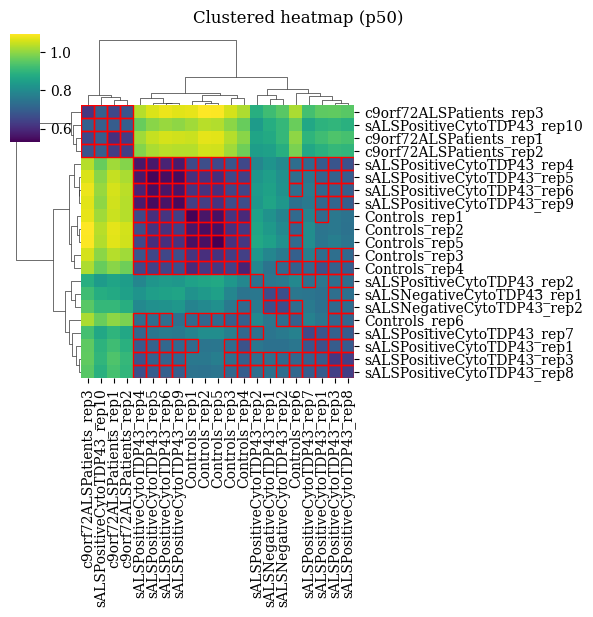

In [30]:
plot_label_clustermap(cell_lines_stats, 
                      figsize=(6,6),
                      method='average', # used for linkage(dist_mat.values, method=method)
                      highlight_thresh=cell_lines_stats[cell_lines_stats.label1 == cell_lines_stats.label2]['p50'].max())